[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week7_AUC_Coding_Challenge_2.ipynb)

# Area-Under-Curve Measurement

Objectives:
* Compute true positive, true negative, false positive, and false negative classification rate
* Adjust classification threshold to control above rates
* Plot AUC  to demonstrate accuracy
* Calculate AUC as a single value

### Background

You want to be familiar with ROC and AUC.

#### Receiver Operating Characteristic Curve (ROC)

[wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall) [sklearn](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

#### Area Under Curve (AUC)

[sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)

The ROC curve provides a visualization of the performance of a classifier, with false-positive rates along the $x$ axis and true-positive rates along the $y$ axis. A perfect classifier produces no false positives (100% specificity) and no false negatives (100% sensitivity). In reality, classifiers are not so discerning.

### Do:

Correct the bugs in the following code blocks in order to work through the mechanics of building an AUC. 

Once you've calculated `FPR` and `TPR` for the Logistic Regression classifier on its Sprint Challenge dataset and visualized the results, modify it to compute the same data using the _test_ data, instead of the _train_ data.

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [1]:
import  numpy  as  np
import  pandas  as  pd
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1', index_col=0)
# Use train_test_split to create a training set
train_x, test_x, train_y, test_y = train_test_split(data[['x1','x2']],data['y'])

# Create and train(fit) the model
regr = LogisticRegression()
regr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the test set

In [2]:
# Predict y_hat for the test set created previously

y_hat = regr.predict(train_x)
print(y_hat)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1.]


### Observe precision

In [3]:
# True positive: if the prediction is 1, and the original data is 1, their sum is 2
true_positives = (y_hat+train_y)==2
# False positive: if the prediction is 1, but the original data is 0, their difference is 1
false_positives = (y_hat-train_y)==1
print(true_positives.T)
print(false_positives.T)

24     True
6     False
10    False
14    False
16    False
9     False
17    False
2     False
5     False
7     False
21     True
29     True
25     True
27     True
20     True
18    False
1     False
26     True
19    False
34     True
3     False
33     True
39     True
35     True
23     True
37     True
22     True
36     True
28    False
30     True
Name: y, dtype: bool
24    False
6     False
10    False
14    False
16    False
9     False
17    False
2     False
5     False
7     False
21    False
29    False
25    False
27    False
20    False
18     True
1      True
26    False
19     True
34    False
3     False
33    False
39    False
35    False
23    False
37    False
22    False
36    False
28    False
30    False
Name: y, dtype: bool


In [4]:
# The probabilities computed by Logistic Regression:
# The columns correspond with class 0 or 1
proba = regr.predict_proba(train_x)
print(proba)

# The decision function computed by Logistic Regression - this is simply
# \sum w_i x_i + b, before the logit function has been applied
dec = regr.decision_function(train_x)
print(dec)

[[0.17140144 0.82859856]
 [0.77136533 0.22863467]
 [0.95334825 0.04665175]
 [0.70363719 0.29636281]
 [0.84633509 0.15366491]
 [0.9449071  0.0550929 ]
 [0.72096784 0.27903216]
 [0.76418577 0.23581423]
 [0.93540484 0.06459516]
 [0.81997398 0.18002602]
 [0.04829297 0.95170703]
 [0.02896897 0.97103103]
 [0.00959439 0.99040561]
 [0.0516722  0.9483278 ]
 [0.02164609 0.97835391]
 [0.23464418 0.76535582]
 [0.44323307 0.55676693]
 [0.01250866 0.98749134]
 [0.45919969 0.54080031]
 [0.07247026 0.92752974]
 [0.90274264 0.09725736]
 [0.1080886  0.8919114 ]
 [0.19118925 0.80881075]
 [0.04148832 0.95851168]
 [0.09931779 0.90068221]
 [0.00921131 0.99078869]
 [0.06381629 0.93618371]
 [0.1718594  0.8281406 ]
 [0.50508783 0.49491217]
 [0.48937492 0.51062508]]
[ 1.57572741 -1.21603668 -3.01726978 -0.86467847 -1.70614108 -2.84206583
 -0.94926749 -1.17576658 -2.67283993 -1.51617122  2.98097118  3.51213312
  4.6369362   2.90978031  3.81104671  1.18227062  0.22805097  4.36874676
  0.16356493  2.54934858 -2.22

### 2.1 Build ROC curves

In [5]:
thresholds = np.linspace(0.0,1.0,11)
predictions = pd.DataFrame()

for decision_threshold in thresholds:
    decision_threshold = np.round(decision_threshold,2)
    true_false_array = (proba[::,1:2:] > decision_threshold).T[0]
    predictions[str(decision_threshold)] = true_false_array.astype(int)
        
print(predictions)

    0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0     1    1    1    1    1    1    1    1    1    0    0
1     1    1    1    0    0    0    0    0    0    0    0
2     1    0    0    0    0    0    0    0    0    0    0
3     1    1    1    0    0    0    0    0    0    0    0
4     1    1    0    0    0    0    0    0    0    0    0
5     1    0    0    0    0    0    0    0    0    0    0
6     1    1    1    0    0    0    0    0    0    0    0
7     1    1    1    0    0    0    0    0    0    0    0
8     1    0    0    0    0    0    0    0    0    0    0
9     1    1    0    0    0    0    0    0    0    0    0
10    1    1    1    1    1    1    1    1    1    1    0
11    1    1    1    1    1    1    1    1    1    1    0
12    1    1    1    1    1    1    1    1    1    1    0
13    1    1    1    1    1    1    1    1    1    1    0
14    1    1    1    1    1    1    1    1    1    1    0
15    1    1    1    1    1    1    1    1    0    0    0
16    1    1  

### 3. Calculate TP and FP at each discrimination level

False positive rate at threshold 0.1:  0.6923076923076923
True positive rate at threshold 0.1:  1.0
            0
0.0  1.000000
0.1  0.692308
0.2  0.538462
0.3  0.230769
0.4  0.230769
0.5  0.230769
0.6  0.076923
0.7  0.076923
0.8  0.000000
0.9  0.000000
1.0  0.000000
            0
0.0  1.000000
0.1  1.000000
0.2  1.000000
0.3  1.000000
0.4  1.000000
0.5  0.941176
0.6  0.882353
0.7  0.882353
0.8  0.882353
0.9  0.647059
1.0  0.000000


Text(0.5,1,'Receiver operating characteristic example')

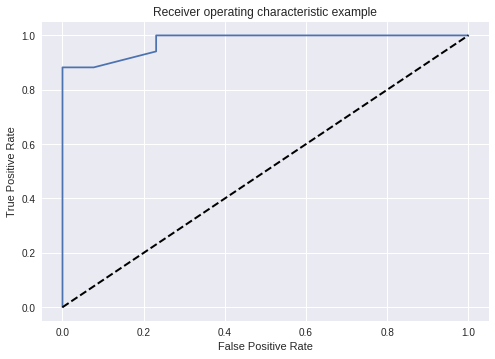

In [6]:
# Base case:
false_positives = np.sum(predictions['0.1']-train_y.values == 1)
true_positives = np.sum(predictions['0.1']+train_y.values==2)
print('False positive rate at threshold 0.1: ',false_positives/np.sum(train_y==0))
print('True positive rate at threshold 0.1: ',true_positives/np.sum(train_y==1))

# Now automate the base case across the set of all decision thresholds
fp = pd.DataFrame()
tp = pd.DataFrame()
for threshold in predictions.columns:
    fp[threshold] = [np.sum(predictions[threshold]-train_y.values==1)/np.sum(train_y==0)]
    tp[threshold] = [np.sum(predictions[threshold]+train_y.values==2)/np.sum(train_y==1)]

# The false positives and true positive rated, based on the sliding decision threshold
print(fp.T)
print(tp.T)

import matplotlib.pyplot as plt
plt.plot(fp.T,tp.T);
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
    

### 4. Example using sklearn

In [7]:
from sklearn import metrics

0.9773755656108597
0.9728506787330315
[0.         0.         0.23076923 0.23076923 1.        ]
[0.05882353 0.88235294 0.88235294 1.         1.        ]


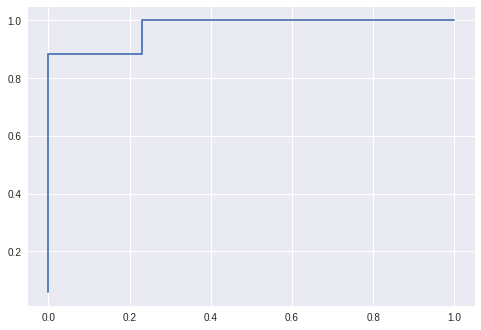

In [8]:
# The Area-Under-The-Curve Score
print(metrics.auc(fp.T,tp.T))
print(metrics.roc_auc_score(train_y.values,proba[::,1:2:]))

# Producing the same false/true positive data via a library and plotting it
fpr, tpr, _ = metrics.roc_curve(train_y.values,proba[::,1:2:])
print(fpr)
print(tpr)
plt.plot(fpr,tpr);

## Do

### 5. Compute the ROC and AUC using the _testset_ instead of the _trainset_


AUC: 1.0


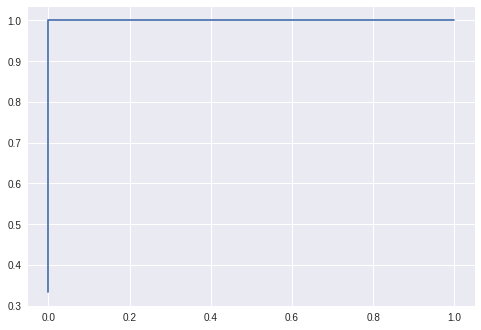

In [9]:
# Compute and plot

# Compute and plot# Comput 
proba = regr.predict_proba(test_x)

fpr, tpr, _ = metrics.roc_curve(test_y.values,proba[::,1:2:])

print('AUC:', metrics.auc(fpr.T,tpr.T))

plt.plot(fpr,tpr);